# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
# set up lists to hold the requested data
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
index_counter = 0
set_counter = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : rikitea
Processing Record 2 of Set 1 : mataura
Processing Record 3 of Set 1 : zaysan
Processing Record 4 of Set 1 : qaanaaq
Processing Record 5 of Set 1 : clonakilty
Processing Record 6 of Set 1 : khatanga
Processing Record 7 of Set 1 : bredasdorp
Processing Record 8 of Set 1 : dunedin
Processing Record 9 of Set 1 : byron bay
Processing Record 10 of Set 1 : chamba
Processing Record 11 of Set 1 : ilulissat
Processing Record 12 of Set 1 : miri
Processing Record 13 of Set 1 : bismarck
Processing Record 14 of Set 1 : port alfred
Processing Record 15 of Set 1 : butaritari
City not found. Skipping...
Processing Record 16 of Set 1 : buala
Processing Record 17 of Set 1 : alamosa
Processing Record 18 of Set 1 : ann arbor
Processing Record 19 of Set 1 : chokurdakh
Processing Record 20 of Set 1 : geraldton
Processing Record 21 of Set 1 : tocache
Processing Record 22 of Set 1 : punta arenas
Processing Record 23 

Processing Record 35 of Set 4 : newport
City not found. Skipping...
Processing Record 36 of Set 4 : wakkanai
Processing Record 37 of Set 4 : caravelas
Processing Record 38 of Set 4 : vlore
Processing Record 39 of Set 4 : smithers
Processing Record 40 of Set 4 : godda
Processing Record 41 of Set 4 : ola
Processing Record 42 of Set 4 : half moon bay
Processing Record 43 of Set 4 : sao filipe
Processing Record 44 of Set 4 : cabedelo
Processing Record 45 of Set 4 : keti bandar
Processing Record 46 of Set 4 : imperia
Processing Record 47 of Set 4 : odienne
Processing Record 48 of Set 4 : eyl
Processing Record 49 of Set 4 : manosque
City not found. Skipping...
Processing Record 50 of Set 4 : roswell
Processing Record 0 of Set 5 : dicabisagan
Processing Record 1 of Set 5 : nemuro
Processing Record 2 of Set 5 : chapleau
Processing Record 3 of Set 5 : mnogovershinnyy
Processing Record 4 of Set 5 : north bend
Processing Record 5 of Set 5 : vaini
Processing Record 6 of Set 5 : ketchikan
Processin

Processing Record 24 of Set 8 : vzmorye
Processing Record 25 of Set 8 : zhigansk
Processing Record 26 of Set 8 : christchurch
Processing Record 27 of Set 8 : kadirli
Processing Record 28 of Set 8 : doha
Processing Record 29 of Set 8 : vicuna
City not found. Skipping...
Processing Record 30 of Set 8 : coquimbo
Processing Record 31 of Set 8 : alugan
Processing Record 32 of Set 8 : kouroussa
Processing Record 33 of Set 8 : palu
Processing Record 34 of Set 8 : skibbereen
Processing Record 35 of Set 8 : pingdu
Processing Record 36 of Set 8 : acapulco
City not found. Skipping...
Processing Record 37 of Set 8 : puerto narino
Processing Record 38 of Set 8 : qaqortoq
Processing Record 39 of Set 8 : venado tuerto
Processing Record 40 of Set 8 : cam ranh
Processing Record 41 of Set 8 : saldanha
Processing Record 42 of Set 8 : freeport
Processing Record 43 of Set 8 : khao wong
Processing Record 44 of Set 8 : wagar
Processing Record 45 of Set 8 : springdale
Processing Record 46 of Set 8 : kavieng
P

Processing Record 10 of Set 12 : caraballeda
Processing Record 11 of Set 12 : riyadh
Processing Record 12 of Set 12 : constitucion
City not found. Skipping...
Processing Record 13 of Set 12 : catio
Processing Record 14 of Set 12 : tabou
Processing Record 15 of Set 12 : lincoln
Processing Record 16 of Set 12 : miragoane
Processing Record 17 of Set 12 : ciudad guayana
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
# Create a panda data frame using data retrieved
weather_data = pd.DataFrame({ 
                "City" : city_name,
                "Cloudiness" : cloudiness,
                "Country" : country,
                "Date" : date,
                "Humidity" : humidity,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp,
                "Wind Speed" : wind_speed
})

In [20]:
# Create a weather dictionary
weather_data.count()

City          578
Cloudiness    578
Country       578
Date          578
Humidity      578
Lat           578
Lng           578
Max Temp      578
Wind Speed    578
dtype: int64

In [21]:
# Display the Weather Data Frame
weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,24,PF,1608092516,65,-23.12,-134.97,25.71,1.57
1,Mataura,100,NZ,1608092516,91,-46.19,168.86,15.00,6.71
2,Zaysan,0,KZ,1608092516,87,47.47,84.87,-16.72,0.31
3,Qaanaaq,0,GL,1608092517,70,77.48,-69.36,-16.67,3.12
4,Clonakilty,75,IE,1608092517,93,51.62,-8.87,9.44,12.90
...,...,...,...,...,...,...,...,...,...
573,Catió,67,GW,1608092611,73,11.28,-15.25,22.57,2.00
574,Tabou,92,CI,1608092595,86,4.42,-7.35,25.51,3.08
575,Lincoln,90,US,1608092584,85,40.80,-96.67,-6.00,2.60
576,Miragoâne,1,HT,1608092612,73,18.44,-73.09,25.03,0.81


In [44]:
# Save city data into a csv file
weather_data.to_csv("output_data/cities.csv", index = False)

In [37]:
#Create Statistics table

weather_data.agg({'Lat':['count', 'mean', 'std', 'min','max'],
                'Lng':['count', 'mean', 'std', 'min', 'max'],
                 'Max Temp':['count', 'mean', 'std', 'min', 'max'],
                 'Humidity':['count', 'mean', 'std', 'min','max'],
                 'Cloudiness':['count', 'mean', 'std', 'min','max'],
                 'Wind Speed':['count', 'mean', 'std', 'min','max'],
                 'Date':['count', 'mean', 'std', 'min','max'],})




,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,20.925346,18.995640,9.877993,76.183391,55.617647,3.691280,1.608093e+09
std,32.857802,90.294127,16.662795,18.411085,39.132546,2.820572,9.067199e+01
min,-54.800000,-175.200000,-41.750000,2.000000,0.000000,0.050000,1.608092e+09
max,78.220000,179.320000,48.000000,100.000000,100.000000,20.600000,1.608093e+09


In [16]:
#need to find out how to get it to the percentages in aggregate statements.

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [42]:
#There are no cities over 100% humidity

weather_data.agg({'Lat':['count', 'mean', 'std', 'min','max'],
                'Lng':['count', 'mean', 'std', 'min', 'max'],
                 'Max Temp':['count', 'mean', 'std', 'min', 'max'],
                 'Humidity':['count', 'mean', 'std', 'min','max'],
                 'Cloudiness':['count', 'mean', 'std', 'min','max'],
                 'Wind Speed':['count', 'mean', 'std', 'min','max'],
                 'Date':['count', 'mean', 'std', 'min','max'],})

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,5.780000e+02
mean,20.925346,18.995640,9.877993,76.183391,55.617647,3.691280,1.608093e+09
std,32.857802,90.294127,16.662795,18.411085,39.132546,2.820572,9.067199e+01
min,-54.800000,-175.200000,-41.750000,2.000000,0.000000,0.050000,1.608092e+09
max,78.220000,179.320000,48.000000,100.000000,100.000000,20.600000,1.608093e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.
#Max humidity is at 100%, nothing is over the 100% humidity

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#Not applicable

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

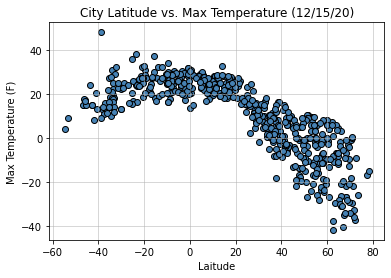

In [45]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (12/15/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("images/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

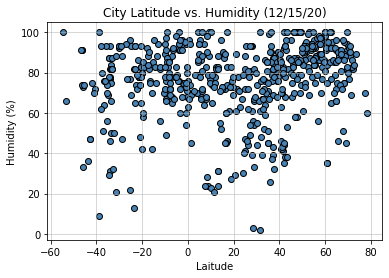

In [48]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (12/15/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

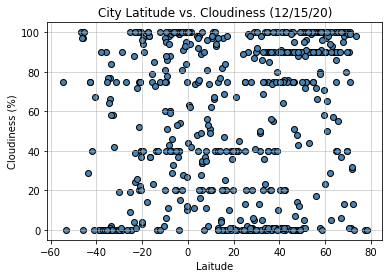

In [49]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (12/15/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

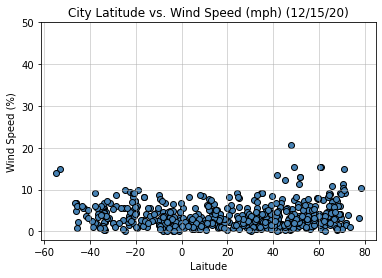

In [50]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (12/15/20)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("Images/City Latitude vs Wind Speed (mph).png")

## Linear Regression

In [69]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_data.loc[weather_data["Lat"] >= 0]
southern_hemisphere = weather_data.loc[weather_data["Lat"] < 0]

In [71]:
# Define function for creating linear agression and scatter plot
def linear_regression(x,y):
    print(f"The r-squared is : {round(stats.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.84


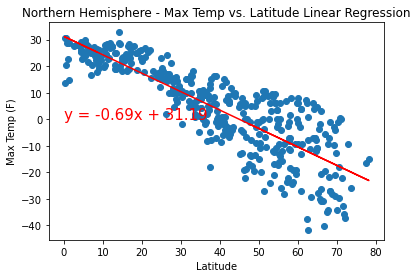

In [74]:
# Call an function #1
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.51


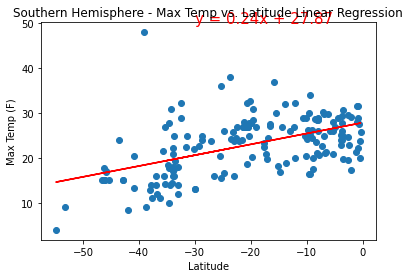

In [75]:
# Call an function #1
equation = linear_regression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


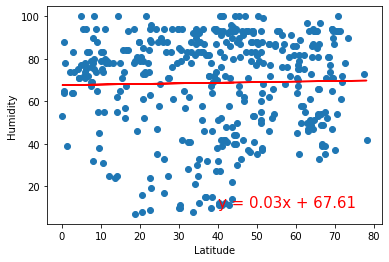

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


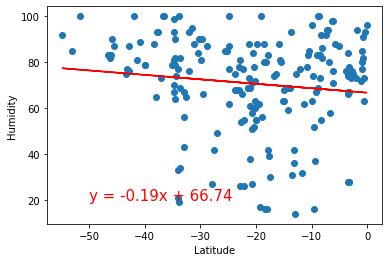

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


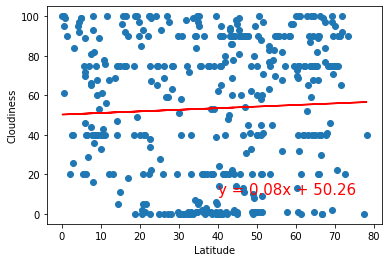

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


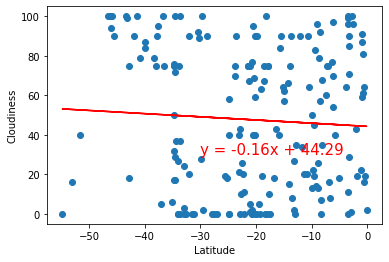

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


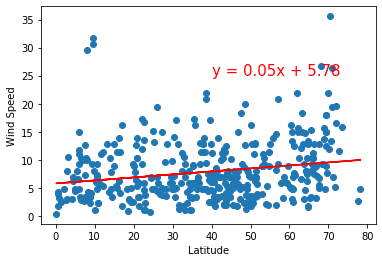

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


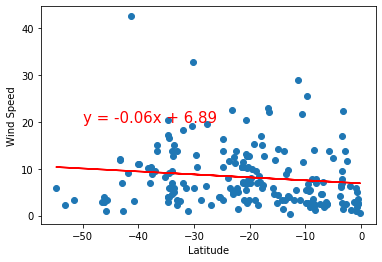